## Rosenblatt Perceptron Implementation

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap 

Perceptron class: 
    Initialization parameters:
    l_rate : float
        Learning rate
    n_iters : int
        Number of epochs to run
    r_seed : float
        Random seed to initialize weights
    Attributes
    w_vector : 1d-array
        Vector of weights after training
    error_list : list
        Number of errors in classification per epoch
    r_seed : float
        Float value to feed into the RNG
    

In [7]:
class Perceptron():

    def __init__(self, l_rate, n_iters, r_seed=1):
        self.l_rate = l_rate
        self.n_iters = n_iters
        self.r_seed = r_seed
    def train(self, X, y): 
        ''' X is a matrix of M x N where Y is an array of M x 1
        M is number of samples 
        N is number of features 
        Trains classifier initializing weights and creating list of errors per epoch ran 
        Returns Perceptron with trained weights and error per epoch info ''' 
        #initialize weights plus bias 
        randomGen = np.random.RandomState(seed=self.r_seed) 
        self.w_vector = randomGen.normal(loc=0.0, scale=0.01, size=1 + np.shape(X)[1]) 
        #initialize error list 
        self.error_list = [] 
        #optimization loop: epochs over training set 
        for _ in range(self.n_iters): 
            errors = 0 
            for sample, target in zip(X, y):
        #Loop over training set, selecting a row and respective target class for each case 
                update = self.l_rate * (target - self.predict(sample)) 
                self.w_vector[0] += update 
                self.w_vector[1:] += (update * sample) 
                #if an update is != 0 then register error 
                if update != 0.0: 
                    errors += 1 
            self.error_list.append(errors) 
        return self 
    def net_input(self, X):
        '''Calculate net input Z defined as X*W to feed into squashing function''' 
        return np.dot(X, self.w_vector[1:]) + self.w_vector[0] 
    def predict(self, X): 
        '''Return class label prediction from input given''' 
        return np.where(self.net_input(X) >= 0.0, 1, -1)


Now the implementation of train() with batch gradient descent (AdaLine)

In [ ]:
'''
    def train(self, X, Y):
        randomGen = np.random.RandomState(seed=self.r_seed) 
        self.w_vector = randomGen.normal(loc=0.0, scale=0.01, size=1 + np.shape(X)[1]) 
        self.cost_list = []
        for i in range(n_iters):
            cost = 0
            output = net_input(X)
            errors = Y - output
            self.w_vector[0] += self.l_rate * errors.sum()
            self.w_vector[1:] += self.l_rate * np.dot(X,errors)
            cost = (errors**2).sum() / 2.0
            self.cost_list.append(cost)
        return self
'''

Now lets test using the iris dataset. We load the dataset into a DataFrame, select the features and classes we want to use and then plot them.

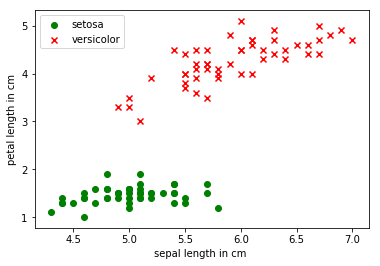

In [8]:
#loading iris dataset into a dataframe 
df  = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)
#select only 2 classes
#get values of the column containing classes
y = df.iloc[0:100, 4].values 
#print(y)
#replace classes for useful numerical values
y = np.where(y == 'Iris-setosa', -1 , 1) 
#print(y)
#Extract only 2 features (sepal lenght and petal lenght)
X = df.iloc[0:100, [0,2]].values
#Scatter plot of the data selected, 
plt.scatter(X[:49, 0], X[:49, 1], label='setosa', color='green') #iris-setosa data points
plt.scatter(X[50:, 0], X[50:, 1], label='versicolor', color='red', marker='x') #iris-versicolor data points
#label for first feature (X1)
plt.xlabel('sepal length in cm ')
#label for second feature (X2)
plt.ylabel('petal length in cm')
plt.legend()
#show the plot
plt.show()

Data ready! Now lets create a perceptron classifier and train it.

1 Predicted for 4 and 4


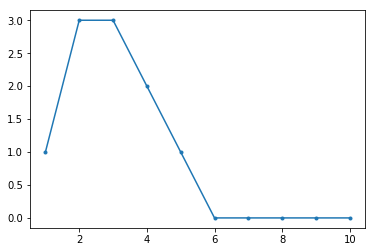

In [9]:
perc = Perceptron(l_rate=0.1, n_iters=10)
perc.train(X, y)
print(str(perc.predict([4,4])) + " Predicted for 4 and 4")
#print(perc.error_list)

#plot error list, X is number of epochs, and Y is errors from error list
plt.plot(range(1,len(perc.error_list) + 1), perc.error_list, marker='.')
plt.xlabel('Epochs')
plt.ylabel('Errors')
plt.show()

Now let's define a function to visualize the decision boundary that the perceptron learned

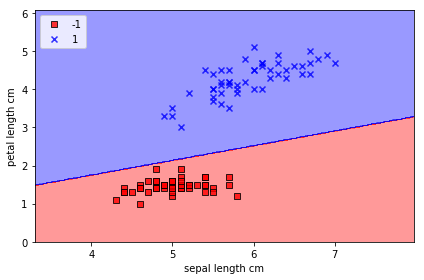

In [10]:
#define function to plot preety decision boundary
def plot_decision_regions(X, y , classifier, resolution=0.02):
    #Setup marker list and color list to feed into colormap
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    #create color map converting the first 2 colors to RGB useful values (we only have 2 classes)
    colormap = ListedColormap(colors[:len(np.unique(y))])
    # get min and max from each feature, this lets us define the surface of the plot where we want to visualize the dec. boundary
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1 
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    # generate meshgrid to map function to multiple coordinates within the area of interest
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    # feed all those pairs of x,y coords, to the classifier raveling the xx1 and xx2 matrixes(cant feed whole matrices)
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    # shape the whole array of predictions to the shape of the matrix xx1
    Z = Z.reshape(xx1.shape)
    # pass the matrices and the Z values to plot a filled contour plot of the decision boundary
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=colormap)
    # establish the limits of the contour visualization to the same range of the points tested
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples on the same plot

    for idx, cl in enumerate(np.unique(y)):#build scatter plots for each class
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colormap(idx),
                    edgecolor='black',
                    marker=markers[idx],
                    label=cl)

plot_decision_regions(X, y, classifier=perc) #use the function
plt.xlabel('sepal length cm')
plt.ylabel('petal length cm')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()
